# US_Covid_Data

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import os

In [86]:
CV=pd.read_csv('US_Covid_Dataset.csv')
CV.shape

(58, 18)

In [87]:
CV.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [88]:
CV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [89]:
CV['Province_State'].nunique()

58

In [90]:
CV.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

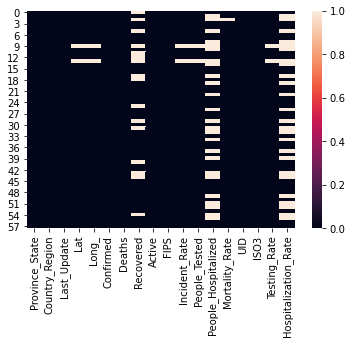

In [91]:
sns.heatmap(CV.isnull())

In [92]:
CV.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [93]:
CV.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [94]:
CV.Last_Update.unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [95]:
CV.ISO3.unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [96]:
CV['Incident_Rate'].fillna(CV['Incident_Rate'].mean(),inplace=True)
CV['Recovered'].fillna(CV['Recovered'].mean(),inplace=True)
CV['People_Tested'].fillna(CV['People_Tested'].mean(),inplace=True)
CV['People_Hospitalized'].fillna(CV['People_Hospitalized'].mean(),inplace=True)
CV['Mortality_Rate'].fillna(CV['Mortality_Rate'].mean(),inplace=True)
CV['Testing_Rate'].fillna(CV['Testing_Rate'].mean(),inplace=True)
CV['Hospitalization_Rate'].fillna(CV['Hospitalization_Rate'].mean(),inplace=True)


In [97]:
CV.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [98]:
CV1=CV.drop(columns=['UID','FIPS','Lat','Long_','Country_Region','Last_Update'],axis=1)

In [99]:
CV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             58 non-null     float64
 4   Active                58 non-null     float64
 5   Incident_Rate         58 non-null     float64
 6   People_Tested         58 non-null     float64
 7   People_Hospitalized   58 non-null     float64
 8   Mortality_Rate        58 non-null     float64
 9   ISO3                  58 non-null     object 
 10  Testing_Rate          58 non-null     float64
 11  Hospitalization_Rate  58 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.6+ KB


In [100]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
CV1['Province_State']=LE.fit_transform(CV1['Province_State'])
CV1['ISO3']=LE.fit_transform(CV1['ISO3'])

CV1.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
1,1,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
2,2,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,0,222.857246,14.342541
3,3,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
4,4,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584


In [101]:
list(LE.classes_)

['ASM', 'GUM', 'MNP', 'PRI', 'USA', 'VIR']

In [102]:
CV1.dtypes

Province_State            int32
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

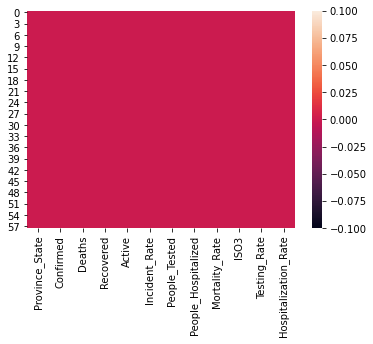

In [103]:
sns.heatmap(CV1.isnull())

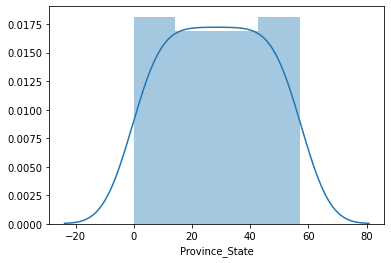

In [104]:
sns.distplot(CV1['Province_State'])

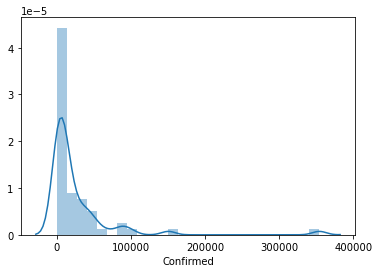

In [105]:
sns.distplot(CV1['Confirmed'])

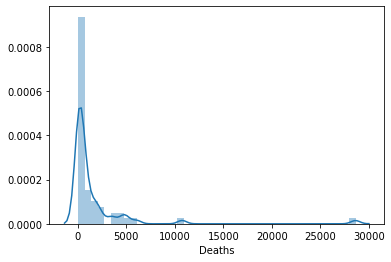

In [106]:
sns.distplot(CV1['Deaths'])

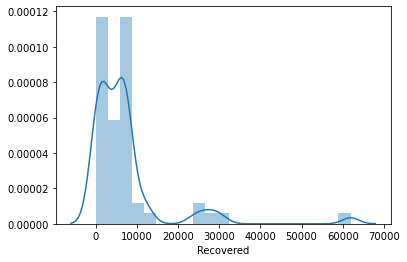

In [107]:
sns.distplot(CV1['Recovered'])

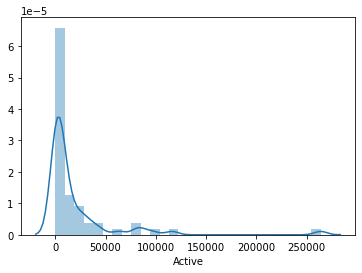

In [108]:
sns.distplot(CV1['Active'])

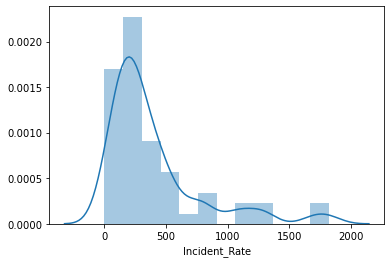

In [109]:
sns.distplot(CV1['Incident_Rate'])

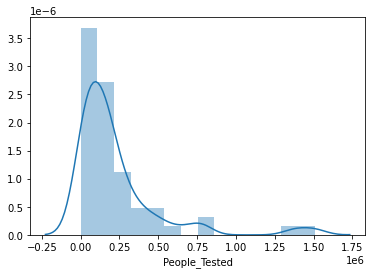

In [110]:
sns.distplot(CV1['People_Tested'])

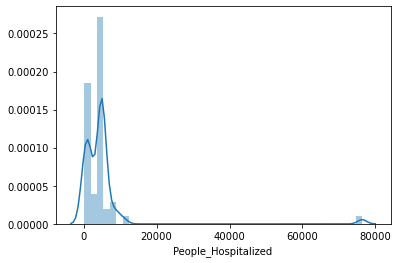

In [111]:
sns.distplot(CV1['People_Hospitalized'])

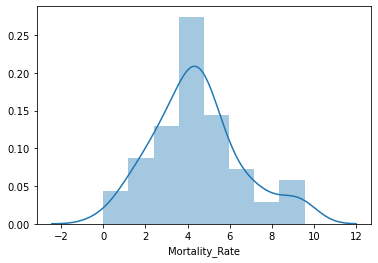

In [112]:
sns.distplot(CV1['Mortality_Rate'])

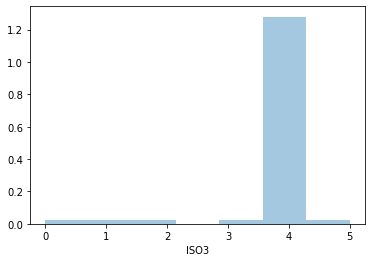

In [113]:
sns.distplot(CV1['ISO3'])

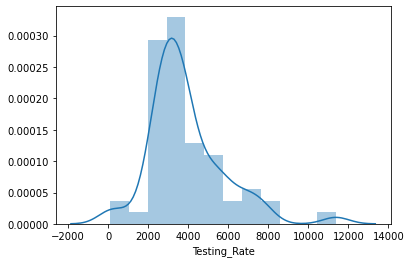

In [114]:
sns.distplot(CV1['Testing_Rate'])

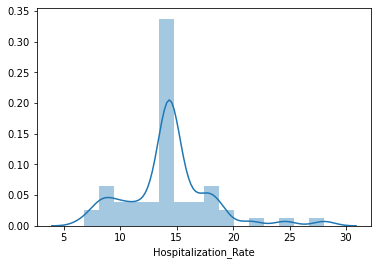

In [115]:
sns.distplot(CV1['Hospitalization_Rate'])

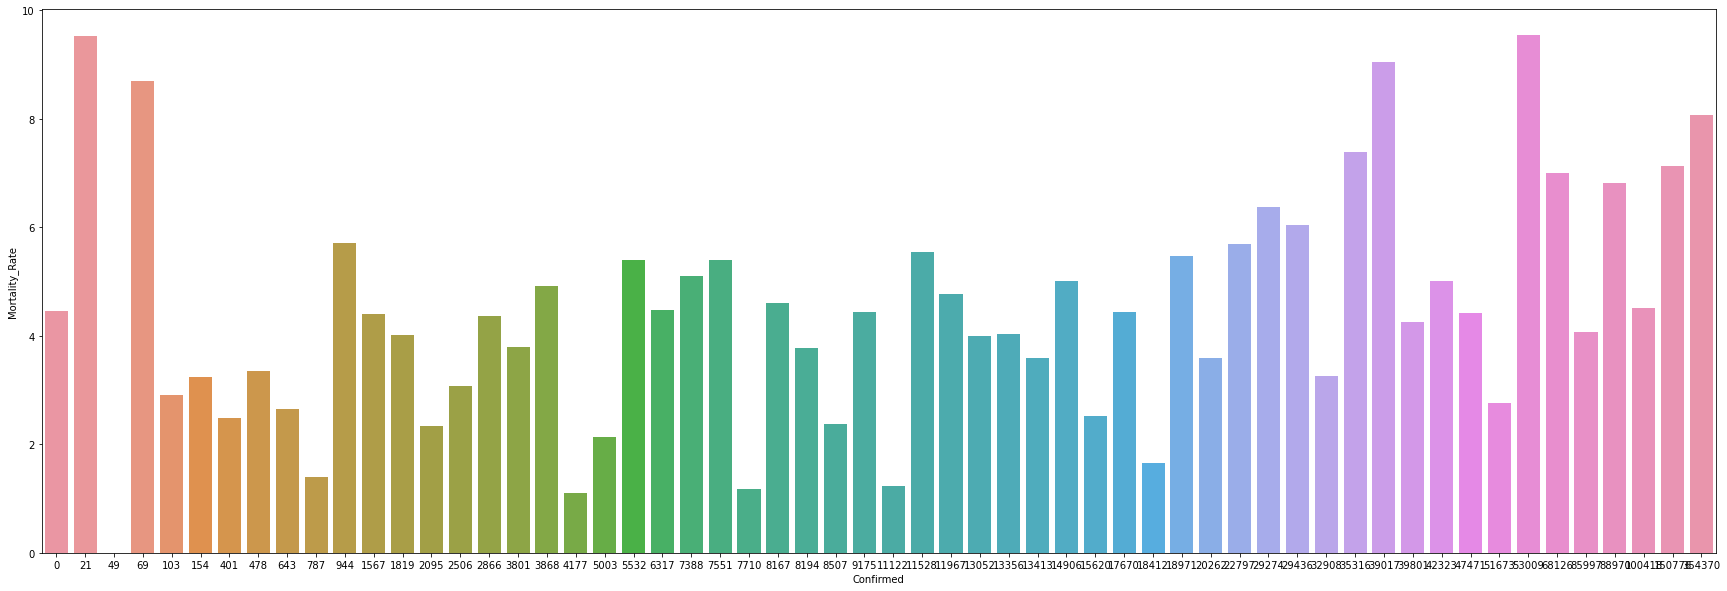

In [116]:
plt.figure(figsize=(30,10))
sns.barplot(CV1['Confirmed'],CV1['Mortality_Rate'])

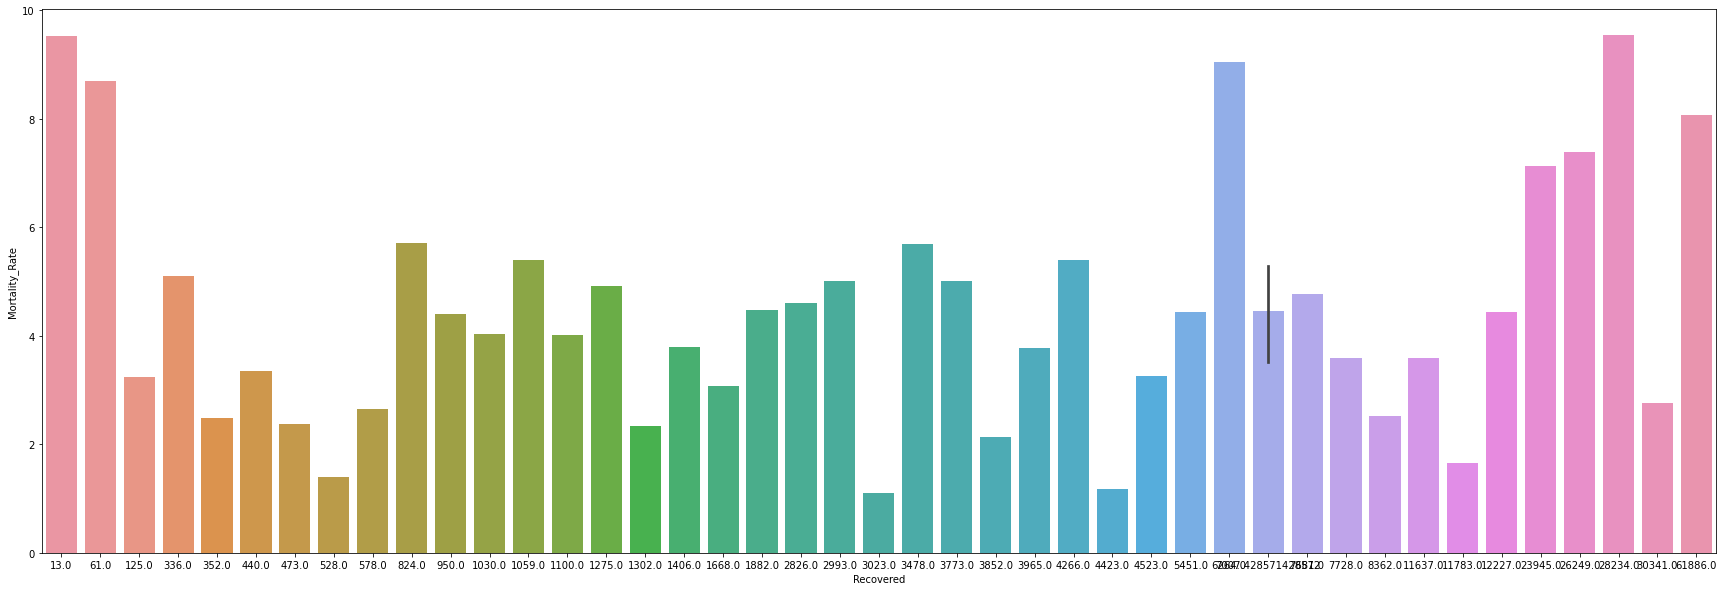

In [117]:
plt.figure(figsize=(30,10))
sns.barplot(CV1['Recovered'],CV1['Mortality_Rate'])

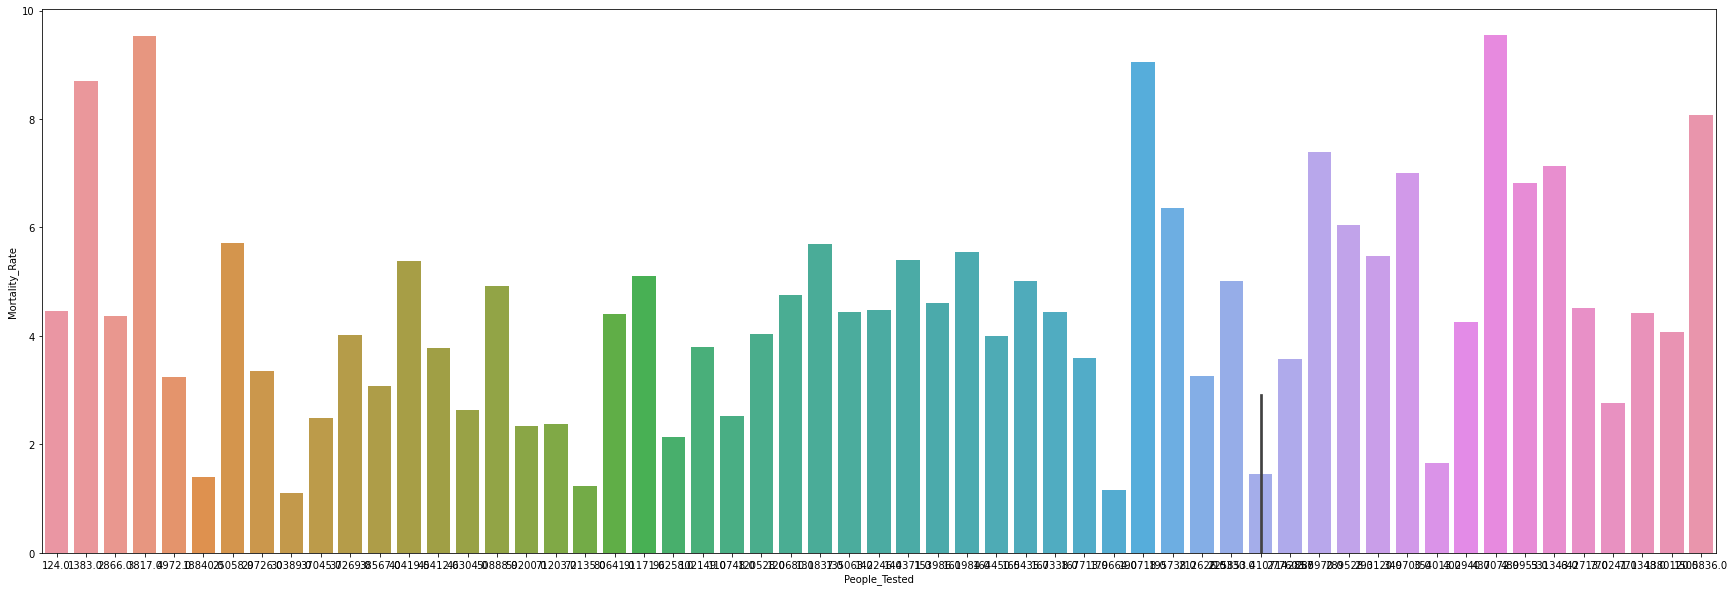

In [118]:
plt.figure(figsize=(30,10))
sns.barplot(CV1['People_Tested'],CV1['Mortality_Rate'])

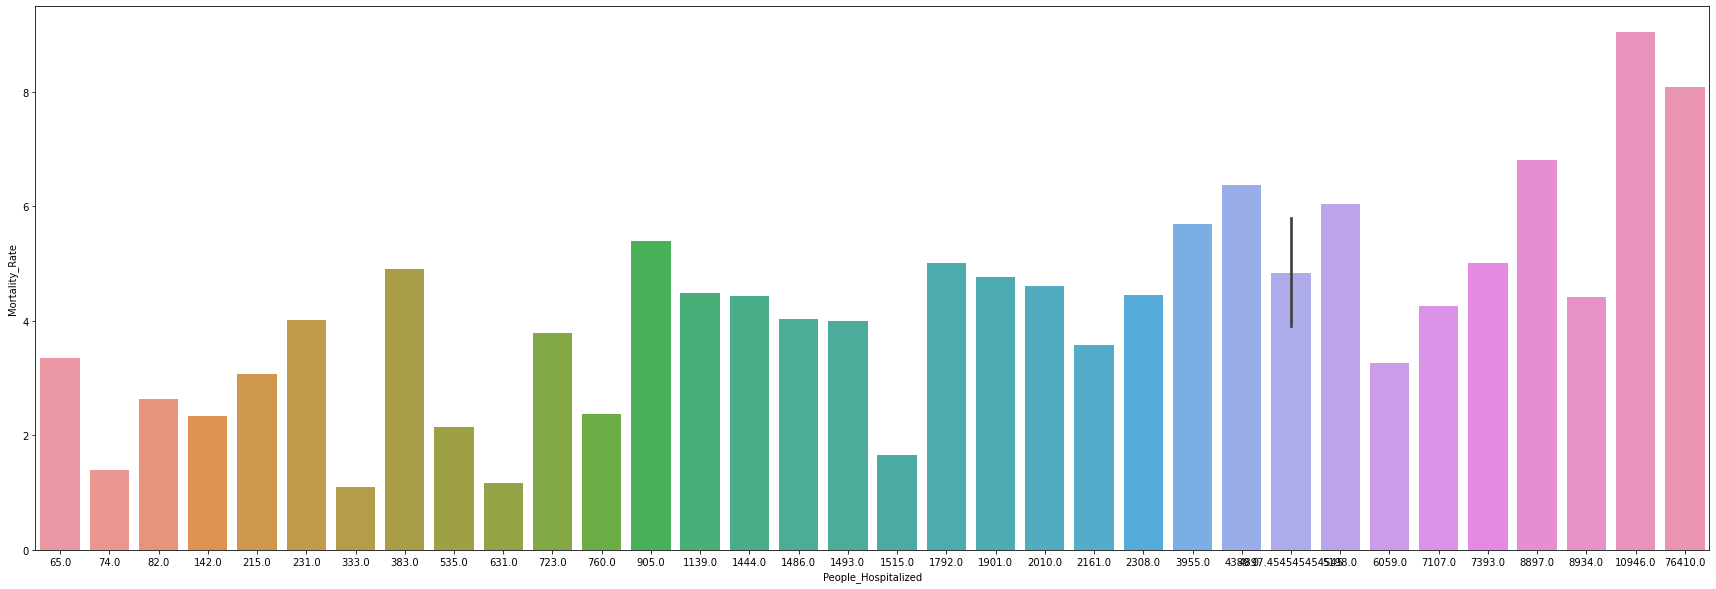

In [119]:
plt.figure(figsize=(30,10))
sns.barplot(CV1['People_Hospitalized'],CV1['Mortality_Rate'])

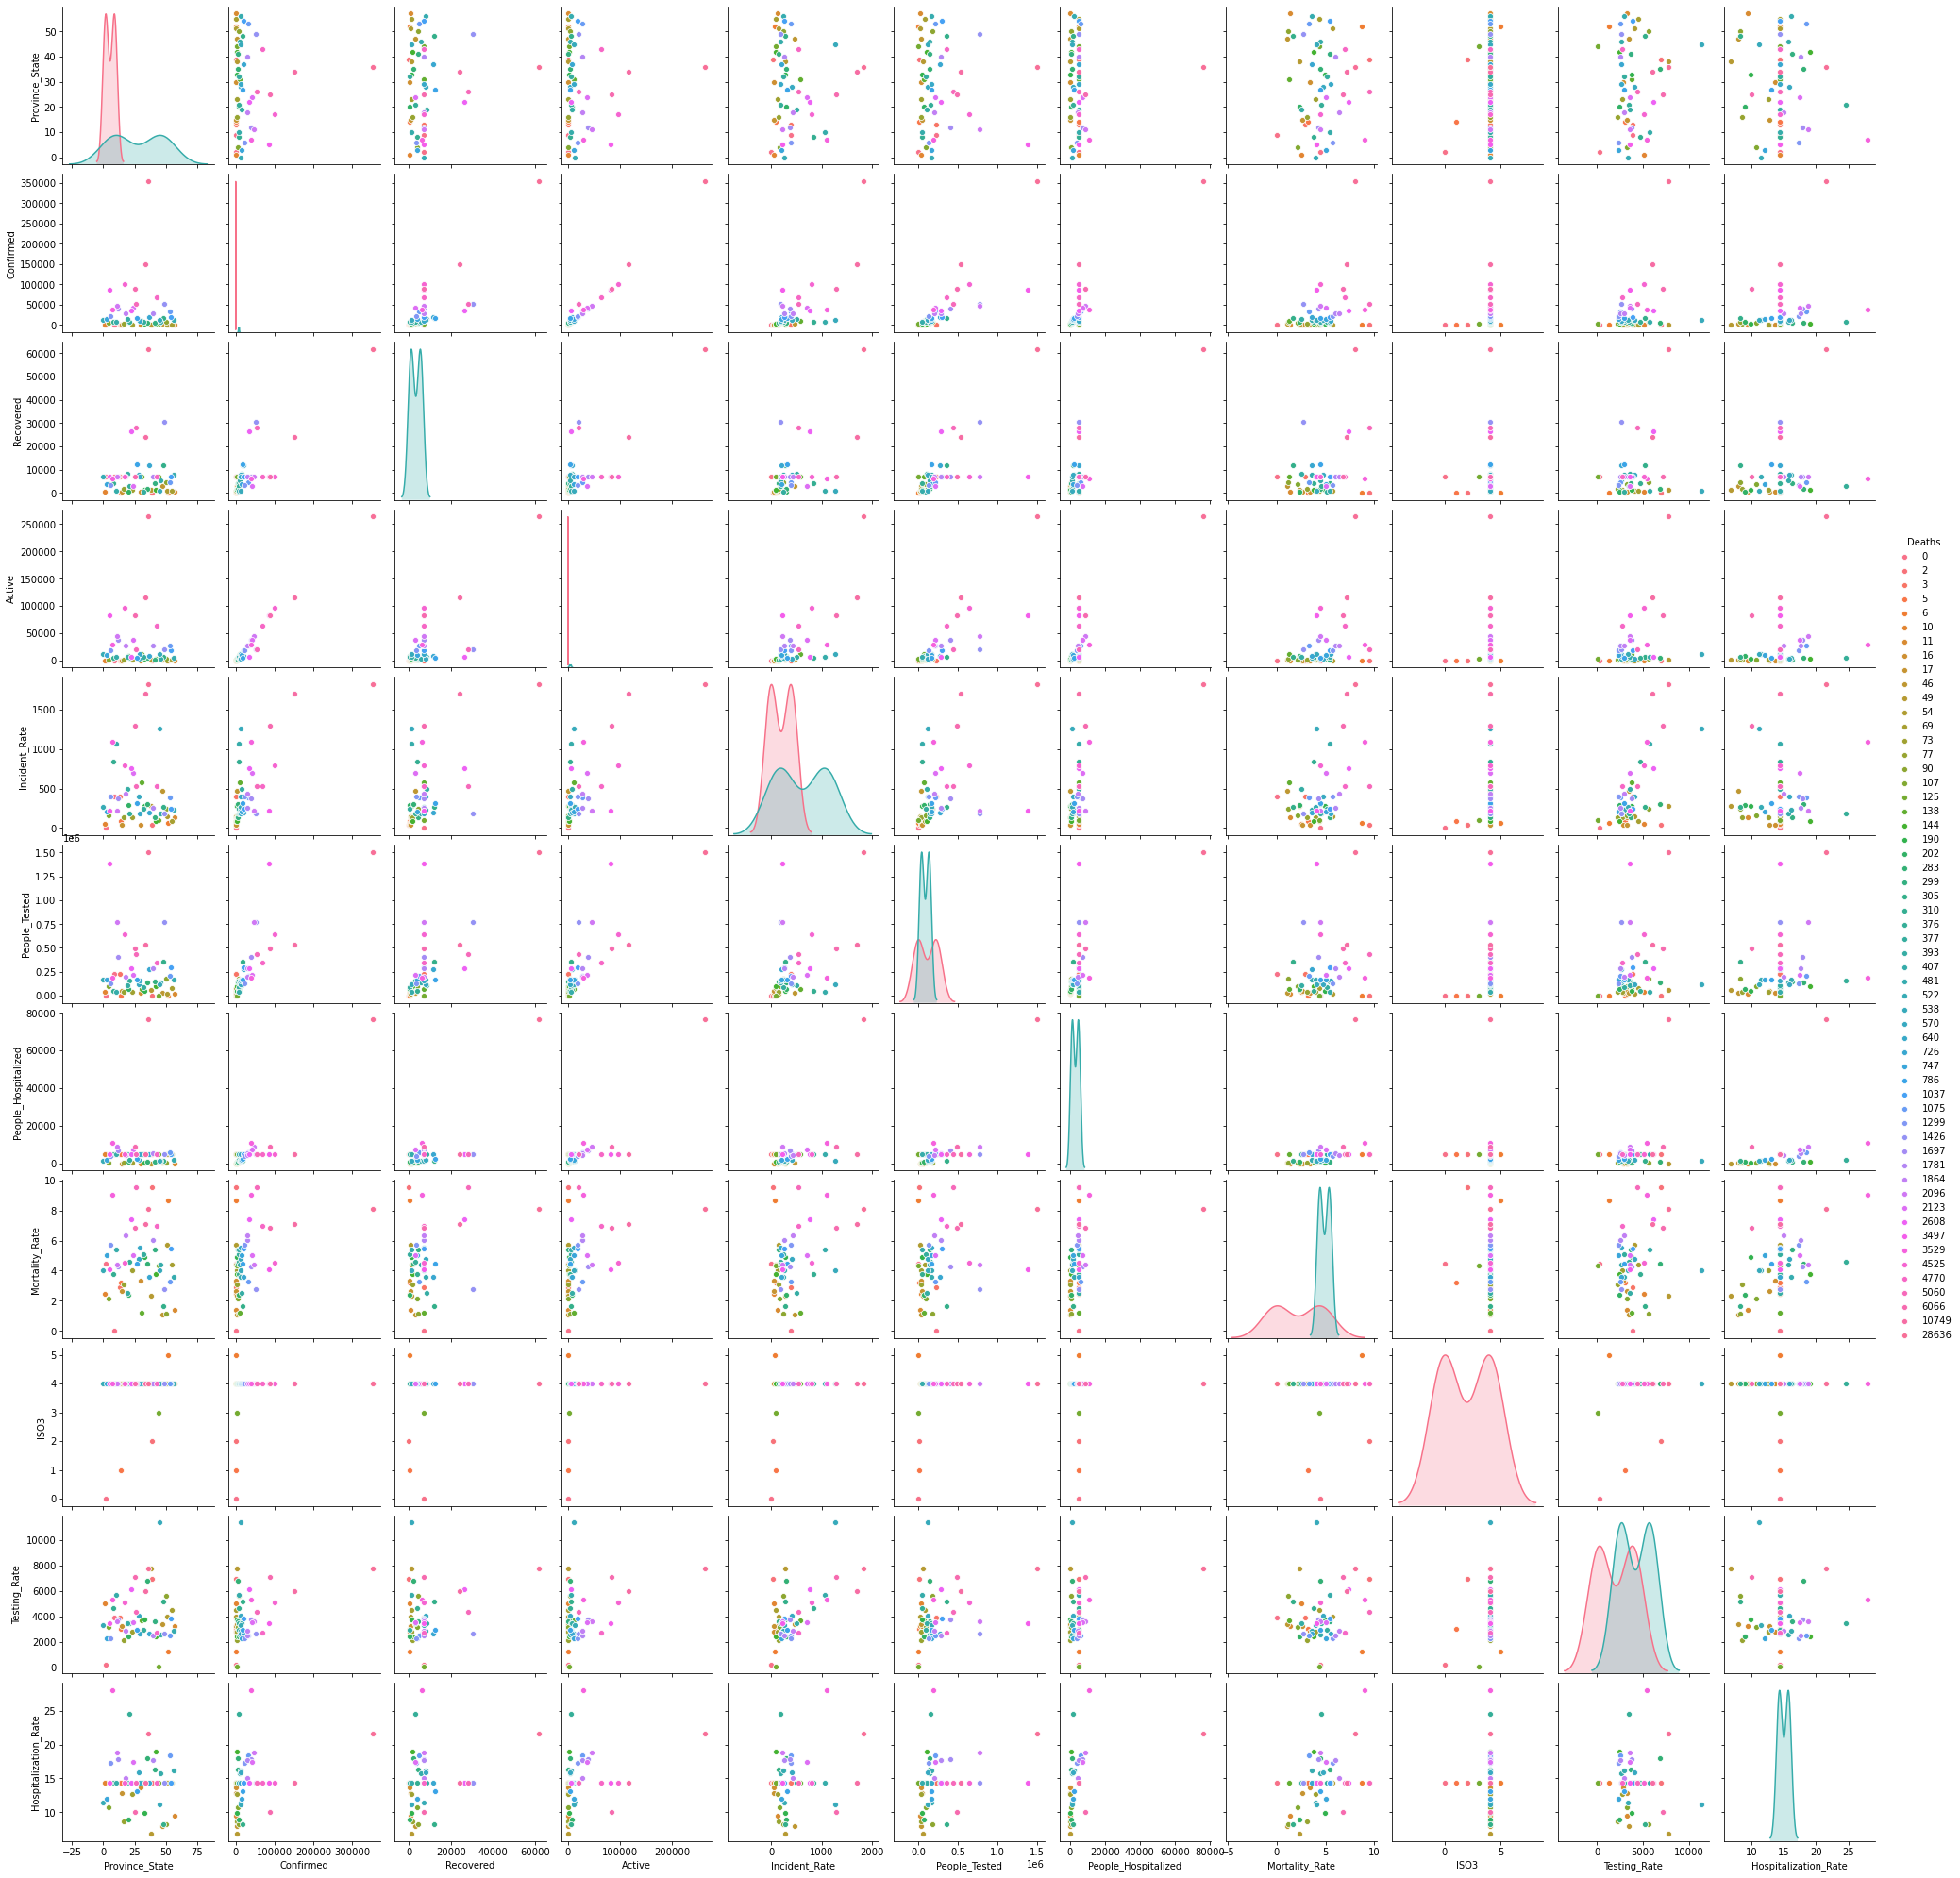

In [120]:
sns.pairplot(CV1,hue='Deaths')

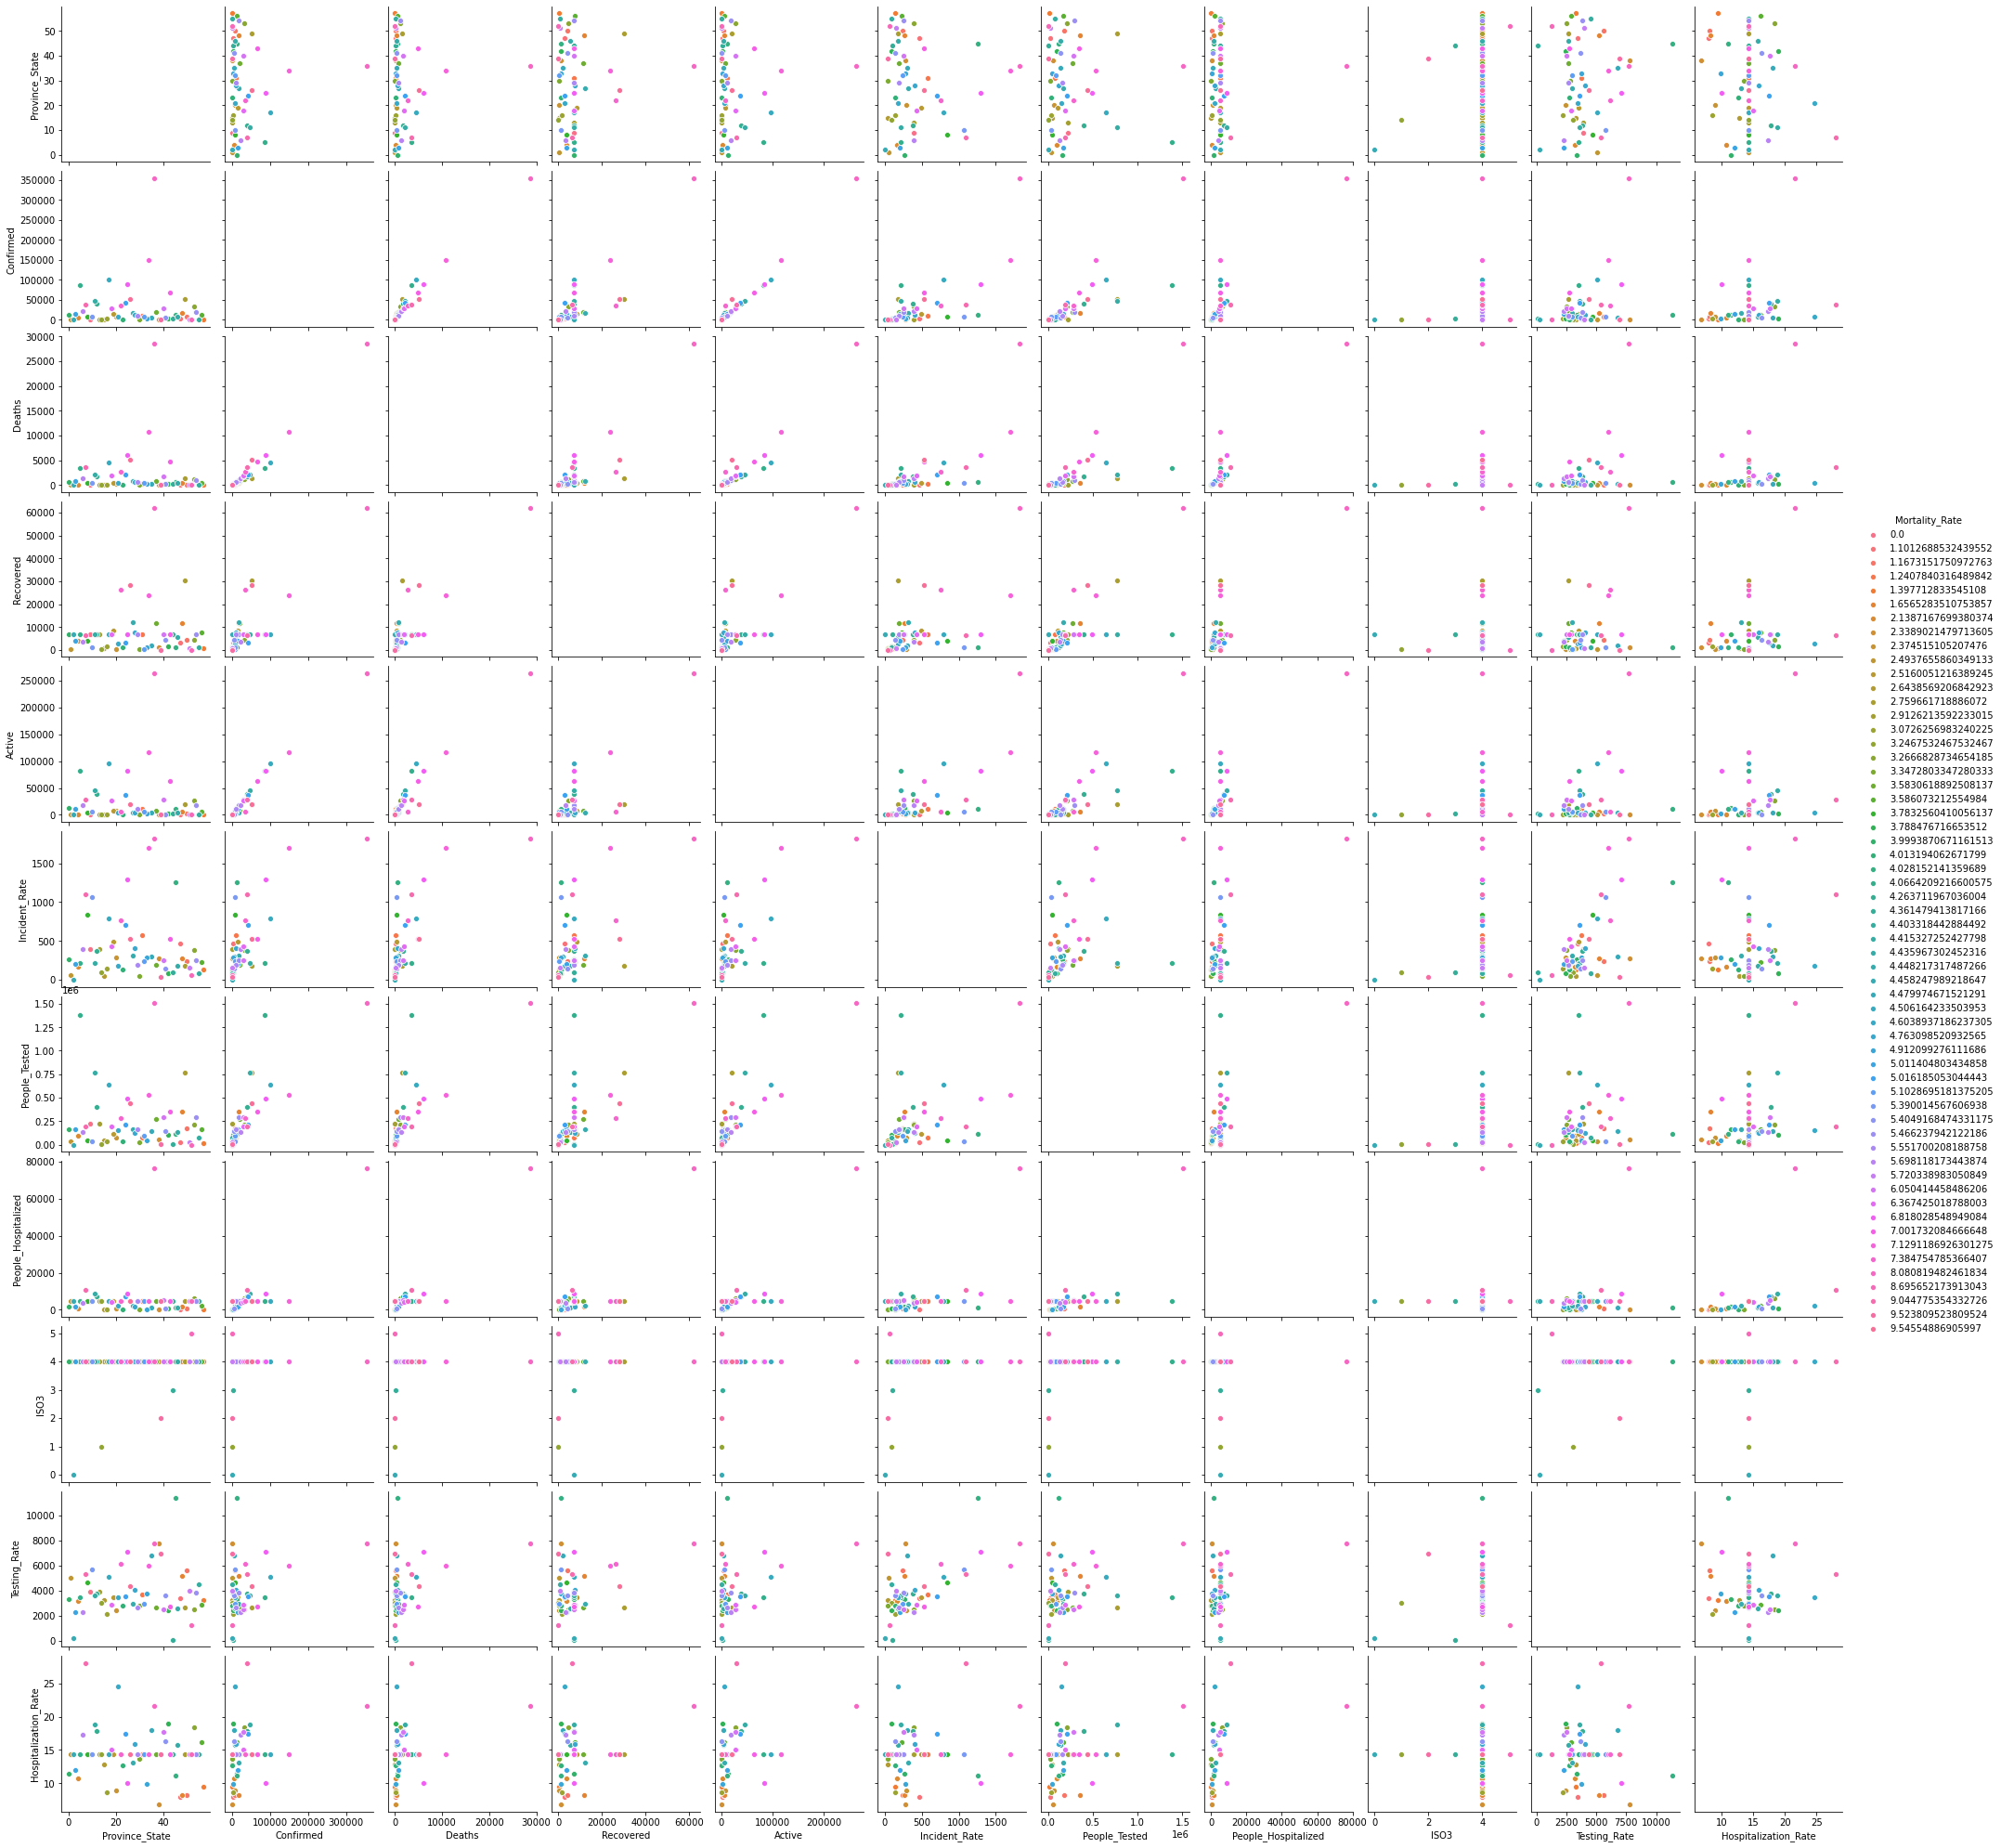

In [121]:
sns.pairplot(CV1,hue='Mortality_Rate')

In [122]:
CV1.corr()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.006490,0.015229,0.067595,-0.027612,-0.078280,-0.065428,5.461319e-03,0.019090,1.967772e-01,0.083183,-1.316941e-01
Confirmed,0.006490,1.000000,0.982191,0.822547,0.985218,0.708436,0.824136,8.692673e-01,0.382537,1.099993e-01,0.332464,2.874708e-01
Deaths,0.015229,0.982191,1.000000,0.830223,0.954378,0.710105,0.739634,9.082786e-01,0.427127,8.558846e-02,0.344465,2.982254e-01
Recovered,0.067595,0.822547,0.830223,1.000000,0.725085,0.542795,0.711255,7.618294e-01,0.322160,6.807968e-02,0.220597,2.316917e-01
Active,-0.027612,0.985218,0.954378,0.725085,1.000000,0.700926,0.826144,8.359377e-01,0.367626,1.048243e-01,0.321395,2.845637e-01
Incident_Rate,-0.078280,0.708436,0.710105,0.542795,0.700926,1.000000,0.441669,5.510764e-01,0.353882,1.954154e-01,0.620621,1.960289e-01
People_Tested,-0.065428,0.824136,0.739634,0.711255,0.826144,0.441669,1.000000,6.420913e-01,0.220200,1.665665e-01,0.230753,2.526802e-01
People_Hospitalized,0.005461,0.869267,0.908279,0.761829,0.835938,0.551076,0.642091,1.000000e+00,0.334335,4.762249e-18,0.270255,3.775863e-01
Mortality_Rate,0.019090,0.382537,0.427127,0.322160,0.367626,0.353882,0.220200,3.343354e-01,1.000000,-2.487630e-02,0.158970,4.512178e-01
ISO3,0.196777,0.109999,0.085588,0.068080,0.104824,0.195415,0.166566,4.762249e-18,-0.024876,1.000000e+00,0.159242,2.644221e-17


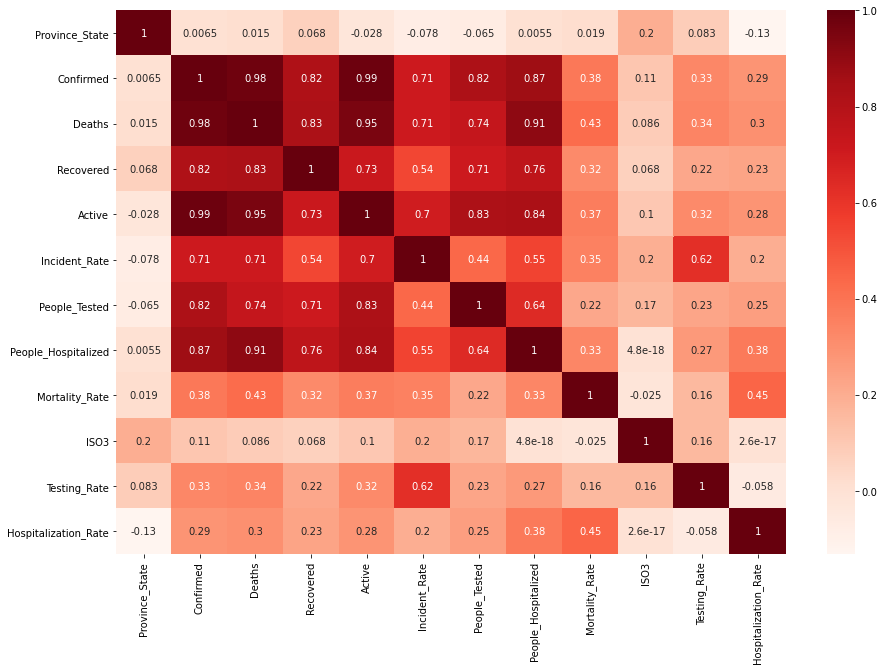

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(CV1.corr(),cmap='Reds',annot=True)

In [124]:
CV1.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

Province_State             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Confirmed               AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Deaths                  AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Recovered               AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Active                  AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Incident_Rate           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
People_Tested                 AxesSubplot(0.125,0.125;0.110714x0.343182)
People_Hospitalized        AxesSubplot(0.257857,0.125;0.110714x0.343182)
Mortality_Rate             AxesSubplot(0.390714,0.125;0.110714x0.343182)
ISO3                       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Testing_Rate               AxesSubplot(0.656429,0.125;0.110714x0.343182)
Hospitalization_Rate       AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

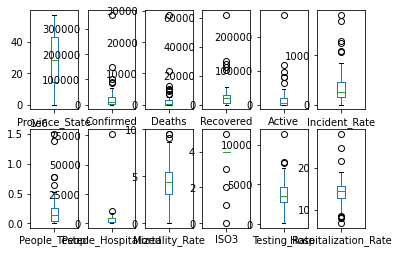

In [125]:
CV1.plot(kind='box',subplots=True, layout=(2,6))

In [126]:
from scipy.stats import zscore
z=np.abs(zscore(CV1))
z

array([[1.70244092e+00, 2.62999251e-01, 2.68934023e-01, 0.00000000e+00,
        1.84202386e-01, 3.31615693e-01, 2.11041917e-01, 3.47604767e-01,
        2.18727182e-01, 2.17198770e-01, 2.86980973e-01, 7.74497410e-01],
       [1.64270615e+00, 5.05788407e-01, 3.95372994e-01, 6.78047590e-01,
        4.89328519e-01, 8.70668532e-01, 6.48929571e-01, 0.00000000e+00,
        9.36418161e-01, 2.17198770e-01, 6.21379592e-01, 4.73806709e-16],
       [1.58297138e+00, 5.13484119e-01, 3.97842505e-01, 0.00000000e+00,
        4.90281199e-01, 1.01045759e+00, 7.75826083e-01, 0.00000000e+00,
        4.23371775e-16, 5.38170286e+00, 1.95023139e+00, 4.73806709e-16],
       [1.52323661e+00, 2.27418578e-01, 2.13370022e-01, 3.29519951e-01,
        2.36575329e-01, 4.88210372e-01, 2.07656498e-01, 3.17075993e-01,
        2.63675605e-01, 2.17198770e-01, 8.61258492e-01, 6.18955558e-01],
       [1.46350184e+00, 4.17470037e-01, 3.71418736e-01, 3.21471520e-01,
        4.64778702e-01, 5.87682563e-01, 4.45416038e-01, 4.45

In [127]:
threshold=3
print(np.where(z>3))

(array([ 2,  5,  7, 14, 34, 36, 36, 36, 36, 36, 36, 36, 45], dtype=int64), array([ 9,  6, 11,  9,  5,  1,  2,  3,  4,  5,  6,  7, 10], dtype=int64))


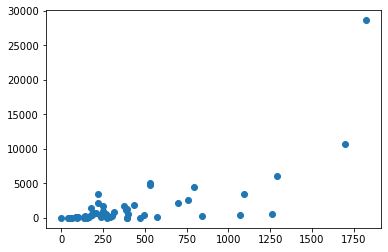

In [128]:
plt.scatter(CV1['Incident_Rate'],CV1['Deaths'])
plt.show()

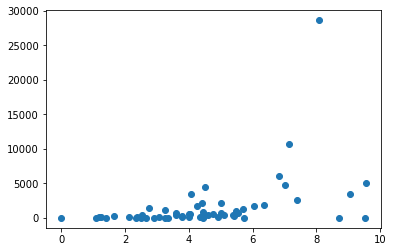

In [129]:
plt.scatter(CV1['Mortality_Rate'],CV1['Deaths'])
plt.show()

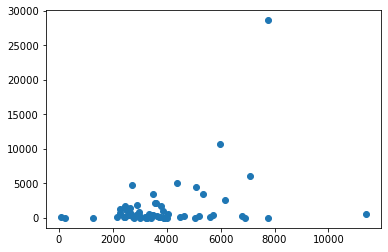

In [130]:
plt.scatter(CV1['Testing_Rate'],CV1['Deaths'])
plt.show()

In [131]:
CV2=CV1[(z<3).all(axis=1)]

In [132]:
print(CV1.shape)
print(CV2.shape)

(58, 12)
(51, 12)


In [133]:
x=CV2.drop(columns=['Deaths'],axis=1)
y=CV2['Deaths']
print(x.shape)
print(y.shape)

(51, 11)
(51,)


In [134]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,shuffle=True)


In [137]:
model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('*******************************************************************')
    print('\n')
    

Score of LinearRegression() is: 0.9434367899878169
Error
Mean absolute error: 453.88765883619885
Mean squared error: 282314.0293395609
Root Mean Squared Error: 531.3323153541114
r2_score: 0.6067112841760911
*******************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error
Mean absolute error: 323.54545454545456
Mean squared error: 360521.9090909091
Root Mean Squared Error: 600.434766724004
r2_score: 0.49776070645711035
*******************************************************************


Score of RandomForestRegressor() is: 0.983672882832235
Error
Mean absolute error: 725.0845454545455
Mean squared error: 1315172.9882454546
Root Mean Squared Error: 1146.8099180969157
r2_score: -0.8321537078528249
*******************************************************************


Score of Lasso() is: 0.9434017783738697
Error
Mean absolute error: 452.40927948853476
Mean squared error: 283380.7539795691
Root Mean Squared Error: 532.3351894995944
r2_sco

In [ ]:
DecisionTreeRegressor is the best model in this case